In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Advertising.csv')
df = df.iloc[:, 1:len(df)]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### 📊 Veri Setinin İçeriği
Veri seti, her satırı bir reklam kampanyasını temsil eden ve aşağıdaki sütunları içeren 200 gözlemden oluşmaktadır:​

* TV: Televizyon reklamlarına yapılan harcama (bin dolar cinsinden)

* Radio: Radyo reklamlarına yapılan harcama (bin dolar cinsinden)

* Newspaper: Gazete reklamlarına yapılan harcama (bin dolar cinsinden)

* Sales: Yapılan satış miktarı (bin birim cinsinden)

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

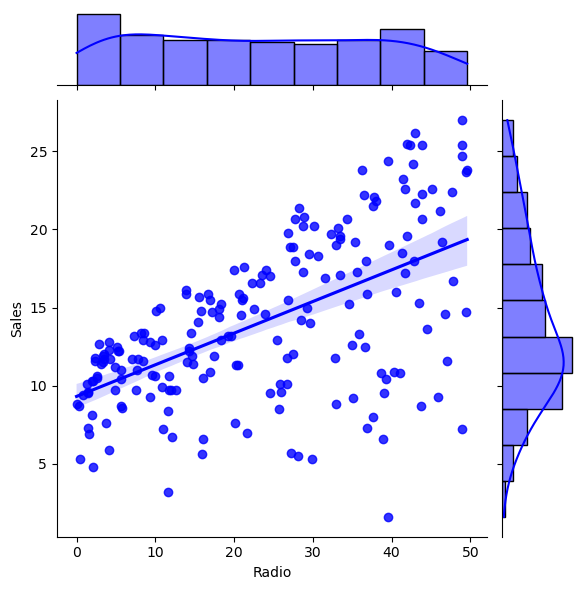

In [5]:
## RADIO 
sns.jointplot(x='Radio', y='Sales', data=df, kind='reg', color='blue');

In [6]:
X = df[['Radio']]
y = df['Sales']

In [7]:
reg = LinearRegression()
model = reg.fit(X, y)

In [ ]:
model.intercept_, model.coef_ ## b0 and b1

(9.311638095158283, array([0.20249578]))

In [9]:
model.score(X, y)

0.33203245544529525

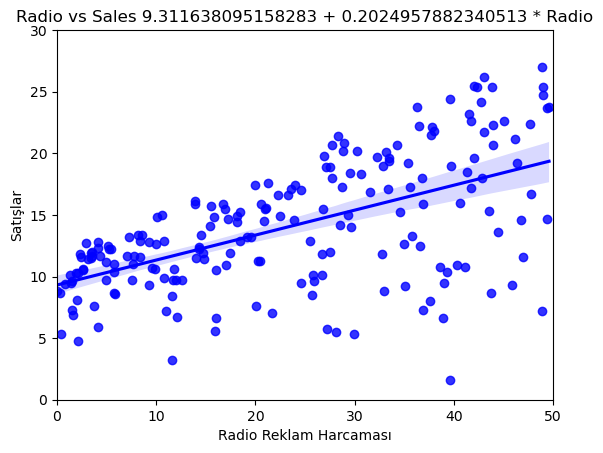

In [11]:
g = sns.regplot(x='Radio', y='Sales', data=df, color='blue')
g.set_title('Radio vs Sales 9.311638095158283 + 0.2024957882340513 * Radio')
g.set_xlabel('Radio Reklam Harcaması')
g.set_ylabel('Satışlar')
plt.xlim(0, 50)
plt.ylim(0, 30)
plt.show()

FORMUL = **9.311638095158283 + 0.2024957882340513 * Radio**

In [13]:
yeni_veri = pd.DataFrame({'Radio': [10, 20, 30, 40, 50]})
model.predict(yeni_veri)

array([11.33659593, 13.36155376, 15.3865116 , 17.41146943, 19.43642726])

**ARTIKLAR**

In [14]:
gercek_y = y.head(10)
tahmin_y = pd.DataFrame(model.predict(X)[0:10])

In [16]:
hatalar = pd.concat([gercek_y, tahmin_y], axis=1)
hatalar.columns = ['GercekR', 'TahminR']
hatalar

,GercekR,TahminR
0,22.1,16.965979
1,10.4,17.269722
2,9.3,18.606195
3,18.5,17.674714
4,12.9,11.498593
5,7.2,19.213682
6,11.8,15.953500
7,13.2,13.280555
8,4.8,9.736879
9,10.6,9.838127


In [17]:
hatalar['Hata'] = hatalar['GercekR'] - hatalar['TahminR']
hatalar

,GercekR,TahminR,Hata
0,22.1,16.965979,5.134021
1,10.4,17.269722,-6.869722
2,9.3,18.606195,-9.306195
3,18.5,17.674714,0.825286
4,12.9,11.498593,1.401407
5,7.2,19.213682,-12.013682
6,11.8,15.953500,-4.153500
7,13.2,13.280555,-0.080555
8,4.8,9.736879,-4.936879
9,10.6,9.838127,0.761873


In [18]:
#MAE
hata_MAE = np.mean(np.abs(hatalar['Hata']))
hata_MAE

4.548312097433002

In [19]:
#MSE
hata_MSE = np.mean(hatalar['Hata'] ** 2)
hata_MSE

34.93413866487737

In [20]:
# RMSE
hata_RMSE = np.sqrt(hata_MSE)
hata_RMSE

5.910510863273781

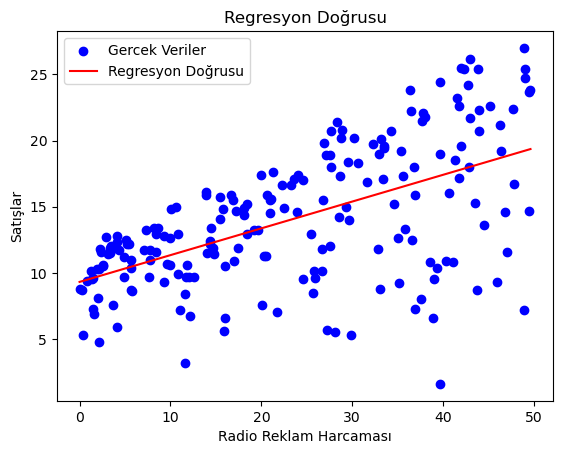

In [24]:
X_range = np.linspace(X.min(), X.max(), 100)

y_line = model.intercept_ + model.coef_[0] * X_range

plt.scatter(X, y, color='blue', label='Gercek Veriler')
plt.plot(X_range, y_line, color='red', label='Regresyon Doğrusu')
plt.title('Regresyon Doğrusu')
plt.xlabel('Radio Reklam Harcaması')
plt.ylabel('Satışlar')
plt.legend()
plt.show()

FORMUL = **9.311638095158283 + 0.2024957882340513 * Radio** \
MAE = 4.548312097433002 \
MSE = 34.93413866487737 \
RMSE = 5.910510863273781 